In [2]:
#import Dependencies
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [3]:
#Print requests
query_url = 'https://api.ed.gov/data/mbk-college-enrollment?'
api_key = 'api_key=bVIf4sU0IzjYfs473ZQEyzOjmZ5hkWeG6vdk5vPc'
per_page = 'per_page=' + '336'
full_url = query_url + api_key + "&" + per_page

CE_data = requests.get(full_url).json()

pprint(CE_data)

{'pagination': {'count': 336, 'page': 1, 'pages': 1, 'per_page': 336},
 'resources': [{'Characteristic': 'Total ',
                'Count': '9452',
                'Note on Count': 'Data are based on samples surveys of the '
                                 'civilian noninstitutional population. Race '
                                 'categories exclude persons of Hispanic '
                                 'ethnicity. Data for persons of two or more '
                                 'races collected separately after 2002.',
                'Note on Percent': 'Data are based on samples surveys of the '
                                   'civilian noninstitutional population. Race '
                                   'categories exclude persons of Hispanic '
                                   'ethnicity. Data for persons of two or more '
                                   'races collected separately after 2002.',
                'Percentage': '35.5',
                'Race/ethnicity': 

                                   'ethnicity. Data for persons of two or more '
                                   'races collected separately after 2002.',
                'Percentage': '33.1',
                'Race/ethnicity': 'Black, non-Hispanic',
                'Sex': None,
                'Standard Error on Count': '54.34',
                'Standard Error on Percentage': '1.15',
                'Year': '2007',
                'index': 63},
               {'Characteristic': 'Total - Black, non-Hispanic',
                'Count': '1311',
                'Note on Count': 'Data are based on samples surveys of the '
                                 'civilian noninstitutional population. Race '
                                 'categories exclude persons of Hispanic '
                                 'ethnicity. Data for persons of two or more '
                                 'races collected separately after 2002.',
                'Note on Percent': 'Data are based on samples sur

                                 'percent or greater. Data are based on '
                                 'samples surveys of the civilian '
                                 'noninstitutional population. Race categories '
                                 'exclude persons of Hispanic ethnicity. Data '
                                 'for persons of two or more races collected '
                                 'separately after 2002.',
                'Note on Percent': 'Data are based on samples surveys of the '
                                   'civilian noninstitutional population. Race '
                                   'categories exclude persons of Hispanic '
                                   'ethnicity. Data for persons of two or more '
                                   'races collected separately after 2002.',
                'Percentage': '36',
                'Race/ethnicity': 'Pacific Islander, non-Hispanic',
                'Sex': None,
                'Standard Error

                                   'ethnicity. Data for persons of two or more '
                                   'races collected separately after 2002.',
                'Percentage': '25.1',
                'Race/ethnicity': 'Black, non-Hispanic',
                'Sex': 'Male',
                'Standard Error on Count': '34.34',
                'Standard Error on Percentage': '1.67',
                'Year': '2000',
                'index': 154},
               {'Characteristic': 'Total - Male, Black, non-Hispanic',
                'Count': '481',
                'Note on Count': 'Data are based on samples surveys of the '
                                 'civilian noninstitutional population. Race '
                                 'categories exclude persons of Hispanic '
                                 'ethnicity. Data for persons of two or more '
                                 'races collected separately after 2002.',
                'Note on Percent': 'Data are based on sam

                                 'for persons of two or more races collected '
                                 'separately after 2002.',
                'Note on Percent': 'Interpret data with caution. The '
                                   'coefficient of variation (CV) for this '
                                   'estimate is between 30 and 50 percent. '
                                   'Data are based on samples surveys of the '
                                   'civilian noninstitutional population. Race '
                                   'categories exclude persons of Hispanic '
                                   'ethnicity. Data for persons of two or more '
                                   'races collected separately after 2002.',
                'Percentage': '20.3',
                'Race/ethnicity': 'American Indian/Alaska Native, non-Hispanic',
                'Sex': 'Male',
                'Standard Error on Count': None,
                'Standard Error on Percenta

                'Race/ethnicity': 'Black, non-Hispanic',
                'Sex': 'Female',
                'Standard Error on Count': '40.97',
                'Standard Error on Percentage': '1.59',
                'Year': '2008',
                'index': 260},
               {'Characteristic': 'Total - Female, Black, non-Hispanic',
                'Count': '912',
                'Note on Count': 'Data are based on samples surveys of the '
                                 'civilian noninstitutional population. Race '
                                 'categories exclude persons of Hispanic '
                                 'ethnicity. Data for persons of two or more '
                                 'races collected separately after 2002.',
                'Note on Percent': 'Data are based on samples surveys of the '
                                   'civilian noninstitutional population. Race '
                                   'categories exclude persons of Hispanic '
            

                'Standard Error on Percentage': '6.43',
                'Year': '2009',
                'index': 317},
               {'Characteristic': 'Total - Female, American Indian/Alaska '
                                  'Native, non-Hispanic',
                'Count': None,
                'Note on Count': 'Reporting standards not met. Either there '
                                 'are too few cases for a reliable estimate or '
                                 'the coefficient of variation (CV) is 50 '
                                 'percent or greater. Data are based on '
                                 'samples surveys of the civilian '
                                 'noninstitutional population. Race categories '
                                 'exclude persons of Hispanic ethnicity. Data '
                                 'for persons of two or more races collected '
                                 'separately after 2002.',
                'Note on Percent': 'Data

In [4]:
#length
length = len(CE_data['resources'])


In [5]:
#collect data for list
percentage=[]
year=[]
race=[]
sex=[]
count=[]
percentage=[]

for a in range(length):
    year.append(int(CE_data['resources'][a]['Year']))
    sex.append(CE_data['resources'][a]['Sex'])
    race.append(CE_data['resources'][a]['Race/ethnicity'])
    percentage.append(CE_data['resources'][a]['Percentage'])
    count.append(CE_data['resources'][a]['Count'])

In [6]:
#create dataframes
CE_race = pd.DataFrame({'Year': year, 'Race': race, 'Count': count, 'Percentage': percentage})
CE_gender = pd.DataFrame({'Year': year, 'Sex': sex, 'Count': count, 'Percentage': percentage})

In [75]:
#replace Race values to other
CE_race_2 = CE_race.replace(to_replace=['Asian, non-Hispanic', 'Pacific Islander, non-Hispanic','American Indian/Alaska Native, non-Hispanic', 'Two or more races, non-Hispanic'], value = 'Other')
CE_race_3 = CE_race_2.replace(to_replace=['White, non-Hispanic', 'Black, non-Hispanic'], value=['Caucasian', 'African-American'])
CE_race_3['Race'].unique()


array([None, 'Caucasian', 'African-American', 'Hispanic', 'Other'],
      dtype=object)

In [8]:
#drop none values
CE_race_3 = CE_race_3.dropna(how='any')
CE_gender = CE_gender.dropna(how='any')

#set percentage to float
CE_race_3['Percentage'] = CE_race_3['Percentage'].astype(float)
CE_race_3['Count'] = CE_race_3['Count'].astype(float)
CE_gender['Percentage'] = CE_gender['Percentage'].astype(float)
CE_gender['Count'] = CE_gender['Count'].astype(float)

In [76]:
#preliminary graphs - gender
#CE_gender_final = pd.DataFrame(CE_gender.groupby(['Year', 'Sex'])['Percentage'].mean())
#CE_gender_final.unstack(level=-1).plot(kind='line')

In [77]:
#preliminary graphs - gender
#CE_race_final = pd.DataFrame(CE_race_3.groupby(['Year', 'Race'])['Percentage'].mean())
#CE_race_final.unstack(level=-1).plot(kind='line')

In [43]:
#cleaning up data, drop count
CE_race_4 = CE_race_3.drop(['Count'], axis=1)
CE_gender_1 = CE_gender.drop(['Count'], axis=1)


,Year,Race,Percentage
42,2000,Caucasian,38.7
43,2001,Caucasian,39.5
44,2002,Caucasian,40.9
45,2003,Caucasian,41.6
46,2004,Caucasian,41.7


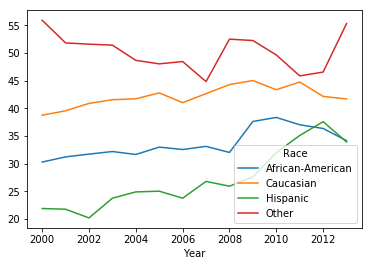

In [79]:
#group by Race and Year, and unstack to get College Enrollment Rate of every Race by Year
CE_race_5 = CE_race_4.groupby(['Year', 'Race'])
CE_race_6 = CE_race_5.mean().unstack(level=-1).stack(level=0)
CE_race_6.reset_index(level=0, inplace=True)
CE_race_6 = CE_race_6.set_index('Year')
CE_race_6.plot(kind='line')

In [67]:
#export to CSV
CE_race_6.to_csv(r'C:\Users\Paola\Documents\GitHub\Project1 - output\CSV\College Enrollment Rate - RacePercentage by Year.csv')

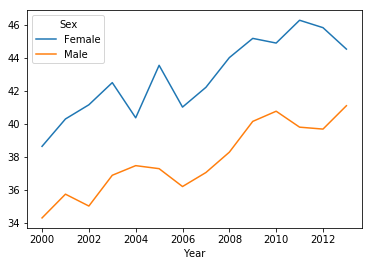

In [78]:
#group by Gender and Year, and unstack to get College Enrollment Rate of every Gender by Year
CE_gender_2 = CE_gender_1.groupby(['Year', 'Sex'])
CE_gender_3 = CE_gender_2.mean().unstack(level=-1).stack(level=0)
CE_gender_3.reset_index(level=0, inplace=True)
CE_gender_3 = CE_gender_3.set_index('Year')
CE_gender_3.plot(kind='line')

In [72]:
CE_gender_3.to_csv(r'C:\Users\Paola\Documents\GitHub\Project1 - output\CSV\College Enrollment Rate - GenderPercentage by Year.csv')